**FEED FORWARD NEURAL NETWORK**

**1) INTRO**

Feed-forward network is an artificial neural network where connections between units do not form loops, differentiating themselves from recurrent neural networks.

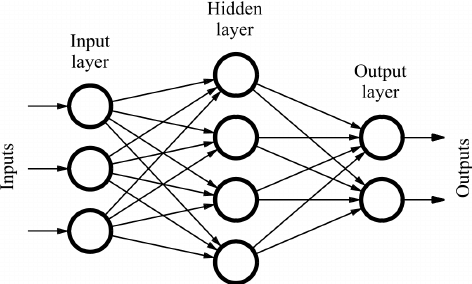

**2) DATASET**

MNIST which is a large database of handwritten figures

**3) MODEL**

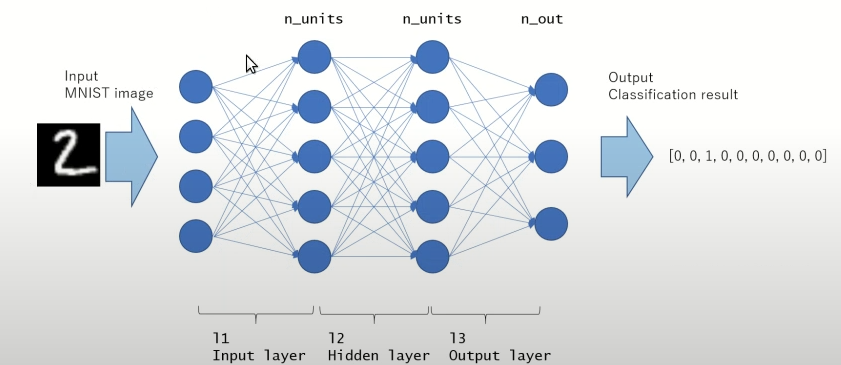

In [ ]:
import tensorflow as tf 
import tensorflow.keras.layers as KL

import numpy as np 
import matplotlib.pyplot as plt

Import dataset and normalize it by dividing it by 255.0

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
print (x_train.shape)

fig,ax = plt.subplots(10,10) 
k = 0
for i in range(10): 
    for j in range(10): 
        ax[i][j].imshow(x_train[k], aspect='auto') 
        k += 1
plt.show()

In [ ]:
print (x_test.shape)

fig,ax = plt.subplots(10,10) 
k = 0
for i in range(10): 
    for j in range(10): 
        ax[i][j].imshow(x_test[k], aspect='auto') 
        k += 1
plt.show()

In [ ]:
# create input layer
inputs = KL.Input(shape=(28, 28))                      #(None, 28, 28)

# flatten the inputs
l = KL.Flatten()(inputs)                               #(None, 784)

# print tensor shape
print ('input -->', inputs.shape)
print ('l -->', (KL.Flatten()(inputs)).shape)

**Dense** is the only actual network layer in that model.

A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer.

It's the most basic layer in neural networks.

A Dense(10) has ten neurons. A Dense(512) has 512 neurons

In [ ]:
l = KL.Dense(512, activation=tf.nn.relu)(l)            #(None, 512)

outputs = KL.Dense(10, activation=tf.nn.softmax)(l)    #(None, 10)

# print tensor shape
print (l.shape)
print (outputs.shape)

(None, 512)
(None, 10)


In [ ]:
#create model (in, out)
model = tf.keras.models.Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                5130

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5)
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {0} - Test Acc: {1}".format(test_loss, test_acc))